# Patient Survival Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

**Data Preprocessing**

In [4]:
data.isnull().sum() #Checking if there are any null value present in the dataset

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [5]:
data.Number_of_prev_cond.value_counts() #Get the different count of values of coulumn : "Number_of_prev_cond"

1.0    9386
2.0    9016
3.0    3026
4.0     397
5.0      37
Name: Number_of_prev_cond, dtype: int64

In [6]:
data.Treated_with_drugs.value_counts() #Get the different count of values of coulumn: "Treated_with_drugs"

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX3 DX4 DX5           24
DX1 DX2 DX3 DX4           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [7]:
data.A.value_counts()

1.0    19630
0.0     2232
Name: A, dtype: int64

As there are missing values in columns "A" , "B" , "C" , "D" , "E" , "F" , "Z" & "Treated_with_drugs", also they have only two
levels of value so will fill the columns with mode

In [8]:
data["A"].fillna(data["A"].mode()[0],inplace = True)
data["B"].fillna(data["B"].mode()[0],inplace = True)
data["C"].fillna(data["C"].mode()[0],inplace = True)
data["D"].fillna(data["D"].mode()[0],inplace = True)
data["E"].fillna(data["E"].mode()[0],inplace = True)
data["F"].fillna(data["F"].mode()[0],inplace = True)
data["Z"].fillna(data["Z"].mode()[0],inplace = True)
data['Treated_with_drugs'].fillna(data['Treated_with_drugs'].mode()[0],inplace = True)

In [9]:
import seaborn as sns

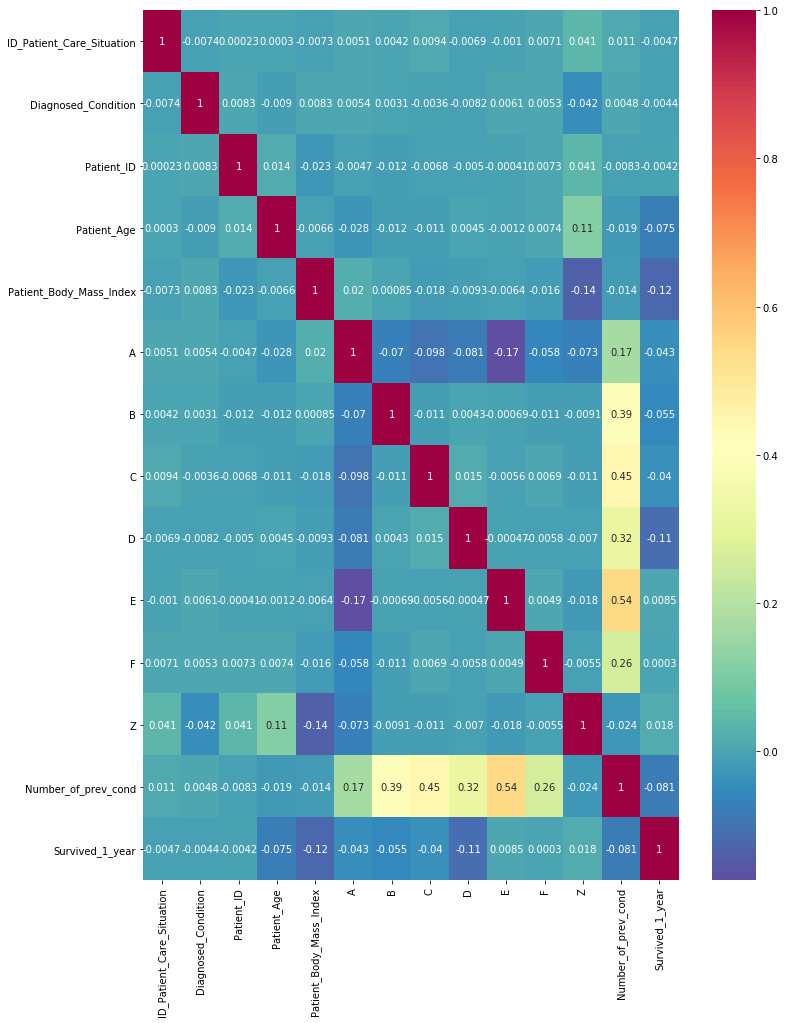

In [10]:
plt.figure(figsize = (12,16))
sns.heatmap(data.corr(),cmap = 'Spectral_r',annot = True); #Find correlation of different columns with each other

In [11]:
data['Number_of_prev_cond'] = data.apply(lambda row: row.A + row.B + row.C + row.D + row.E + row.F + row.Z, axis = 1)

In [12]:
data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [13]:
data.Patient_Smoker.value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [14]:
data.Patient_Smoker = data.Patient_Smoker.apply(lambda x : 1 if x == 'YES' else 0)

In [15]:
data.Patient_Smoker.value_counts()

0    13259
1     9838
Name: Patient_Smoker, dtype: int64

In [16]:
data.Patient_Rural_Urban.value_counts()

RURAL    16134
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

In [17]:
data.Patient_Rural_Urban = data.Patient_Rural_Urban.apply(lambda x : 1 if x == 'RURAL' else 0)

In [18]:
data.Patient_Rural_Urban.value_counts()

1    16134
0     6963
Name: Patient_Rural_Urban, dtype: int64

In [19]:
data.Patient_mental_condition.value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

In [20]:
data.Patient_mental_condition = data.Patient_mental_condition.apply(lambda x : 1 if x == 'Stable' else 0)

In [21]:
data.Patient_mental_condition.value_counts()

1    23097
Name: Patient_mental_condition, dtype: int64

In [22]:
data = pd.get_dummies(data, columns = ['Treated_with_drugs'])
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6
0,22374,8,3333,56,18.479385,1,0,1,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,18164,5,5740,36,22.945566,1,1,1,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,6283,23,10446,48,27.510027,1,1,1,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,5339,51,12011,5,19.130976,0,0,1,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,33012,0,12513,128,1.348400,0,1,1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
X = data.drop(['ID_Patient_Care_Situation','Diagnosed_Condition','Survived_1_year'], axis =1)
y = data.Survived_1_year

In [24]:
X.shape

(23097, 46)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, test_size = 0.3)

In [26]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [27]:
LR.fit(X_train, y_train)

LogisticRegression()

In [28]:
predict = LR.predict(X_test)

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test,predict)
print('Test accuracy :',f1_score(y_test,predict))

Test accuracy : 0.7861429925239549


In [30]:
pred = LR.predict(X_train)
print('Train accuracy :',f1_score(y_train,pred))

Train accuracy : 0.7884176926584587


In [31]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
x=HistGradientBoostingClassifier(random_state=2,max_depth=3
                                 ,max_iter=10450,min_samples_leaf=100,
                                  l2_regularization=25.0,learning_rate=0.0175)
x.fit(X_train,y_train)

HistGradientBoostingClassifier(l2_regularization=25.0, learning_rate=0.0175,
                               max_depth=3, max_iter=10450,
                               min_samples_leaf=100, random_state=2)

In [35]:
pred0=x.predict(X_test)

In [36]:
from sklearn.metrics import f1_score
f1_score(y_test,pred0)

0.8454575199040244

In [37]:
Pharma_test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
Pharma_test.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
Pharma_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

In [39]:
Pharma_test = Pharma_test.drop(['ID_Patient_Care_Situation','Diagnosed_Condition'],axis = 1)

In [40]:
Pharma_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                9303 non-null   int64  
 1   Treated_with_drugs        9303 non-null   object 
 2   Patient_Age               9303 non-null   int64  
 3   Patient_Body_Mass_Index   9303 non-null   float64
 4   Patient_Smoker            9303 non-null   object 
 5   Patient_Rural_Urban       9303 non-null   object 
 6   Patient_mental_condition  9303 non-null   object 
 7   A                         9303 non-null   float64
 8   B                         9303 non-null   float64
 9   C                         9303 non-null   float64
 10  D                         9303 non-null   float64
 11  E                         9303 non-null   float64
 12  F                         9303 non-null   float64
 13  Z                         9303 non-null   float64
 14  Number_o

In [41]:
Pharma_test.isna().sum()

Patient_ID                  0
Treated_with_drugs          0
Patient_Age                 0
Patient_Body_Mass_Index     0
Patient_Smoker              0
Patient_Rural_Urban         0
Patient_mental_condition    0
A                           0
B                           0
C                           0
D                           0
E                           0
F                           0
Z                           0
Number_of_prev_cond         0
dtype: int64

In [42]:
Pharma_test.Patient_Smoker = Pharma_test.Patient_Smoker.apply(lambda x : 1 if x == 'YES' else 0)
Pharma_test.Patient_Rural_Urban = Pharma_test.Patient_Rural_Urban.apply(lambda x : 1 if x == 'RURAL' else 0)
Pharma_test.Patient_mental_condition = Pharma_test.Patient_mental_condition.apply(lambda x : 1 if x == 'Stable' else 0)
Pharma_test = pd.get_dummies(Pharma_test, columns = ['Treated_with_drugs'])

In [43]:
preds = LR.predict(Pharma_test)

In [44]:
preds

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [45]:
res = pd.DataFrame(preds)
res.index = Pharma_test.index 
res.columns = ["prediction"]
res.to_csv("prediction_results.csv")